In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the training and test data from CSV files
train_file_path = "C:\\Users\\Shriyam Singh Tiwari\\Documents\\Train.csv"  # Replace with your actual file path
test_file_path = "C:\\Users\\Shriyam Singh Tiwari\\Documents\\Test.csv"  # Replace with your actual file path

train_df = pd.read_csv(train_file_path)
train_df.reset_index()
test_df = pd.read_csv(test_file_path)

# Display the first few rows of the training dataset
print("First few rows of the training dataset:")
print(train_df.head())


First few rows of the training dataset:
   Age      Climate Weather  Location Preference              State  Occasion  \
0   27    Semi-arid   Humid     Rural     Modest            Gujarat     Party   
1   23     Tropical   Rainy  Suburban     Trendy         Tamil Nadu    Casual   
2   29  Subtropical  Cloudy     Urban     Modest              Bihar  Festival   
3   26    Temperate   Sunny     Rural     Trendy  Himanchal Pradesh    Casual   
4   28    Semi-arid   Sunny     Urban     Modest              Delhi     Party   

         Target  
0  Short Kurtis  
1  Short Kurtis  
2  Short Kurtis  
3  Short Kurtis  
4  Short Kurtis  


In [11]:
# Check for missing values in the training data
print("\nChecking for missing values in the training data:")
print(train_df.isnull().sum())

# Split the training data into features and target variable
X_train_full = train_df.drop(columns='Target')
y_train_full = train_df['Target']

# Perform the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


Checking for missing values in the training data:
Age           0
Climate       0
Weather       0
Location      0
Preference    0
State         0
Occasion      0
Target        0
dtype: int64


In [21]:
# Define numerical and categorical columns
numerical_columns = ['Age']  # No scaling needed for age
categorical_columns = ['Climate', 'Weather', 'Location', 'Preference', 'State', 'Occasion']

# Create preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Handle missing values
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

In [23]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Create a preprocessing pipeline for the entire data
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [25]:
# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the validation data
X_val_processed = pipeline.transform(X_val)

# Transform the test data for final predictions
X_test_processed = pipeline.transform(test_df)


In [27]:
X_train.columns

Index(['Age', 'Climate', 'Weather', 'Location', 'Preference', 'State',
       'Occasion'],
      dtype='object')

In [29]:
# Convert the processed data back to DataFrame for easier inspection
X_train_processed_df = pd.DataFrame(X_train_processed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
X_val_processed_df = pd.DataFrame(X_val_processed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
X_test_processed_df = pd.DataFrame(X_test_processed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

In [31]:
# Display the first few rows of the processed training, validation, and test data
print("\nFirst few rows of the processed training data:")
print(X_train_processed_df.head())
print(y_train.head())

print("\nFirst few rows of the processed validation data:")
print(X_val_processed_df.head())
print(y_val.head())

print("\nFirst few rows of the processed test data:")
print(X_test_processed_df.head())


First few rows of the processed training data:
   num__Age  cat__Climate_Semi-arid  cat__Climate_Subtropical  \
0      34.0                     0.0                       1.0   
1      27.0                     1.0                       0.0   
2      31.0                     0.0                       0.0   
3      29.0                     0.0                       0.0   
4      28.0                     0.0                       0.0   

   cat__Climate_Temperate  cat__Climate_Tropical  cat__Weather_Cloudy  \
0                     0.0                    0.0                  1.0   
1                     0.0                    0.0                  0.0   
2                     1.0                    0.0                  0.0   
3                     1.0                    0.0                  0.0   
4                     0.0                    1.0                  0.0   

   cat__Weather_Humid  cat__Weather_Rainy  cat__Weather_Sunny  \
0                 0.0                 0.0                

In [33]:
# Save the processed training, validation, and test data to new CSV files
processed_train_file_path = 'path/to/your/processed_train_dataset.csv'  # Replace with your desired file path
processed_val_file_path = 'path/to/your/processed_val_dataset.csv'  # Replace with your desired file path
processed_test_file_path = 'path/to/your/processed_test_dataset.csv'  # Replace with your desired file path


In [35]:
# Combine processed features and target variable for saving
train_processed = pd.concat([X_train_processed_df, y_train.reset_index(drop=True)], axis=1)
val_processed = pd.concat([X_val_processed_df, y_val.reset_index(drop=True)], axis=1)

train_processed.to_csv("Processed_Train.csv", index=False)
val_processed.to_csv("Processed_Val.csv", index=False)
X_test_processed_df.to_csv("Processed_Test.csv", index=False)

print(f"\nProcessed training data saved to {processed_train_file_path}")
print(f"Processed validation data saved to {processed_val_file_path}")
print(f"Processed test data saved to {processed_test_file_path}")


Processed training data saved to path/to/your/processed_train_dataset.csv
Processed validation data saved to path/to/your/processed_val_dataset.csv
Processed test data saved to path/to/your/processed_test_dataset.csv


First few rows of the dataset:
   Age      Climate Weather  Location Preference              State  Occasion  \
0   27    Semi-arid   Humid     Rural     Modest            Gujarat     Party   
1   23     Tropical   Rainy  Suburban     Trendy         Tamil Nadu    Casual   
2   29  Subtropical  Cloudy     Urban     Modest              Bihar  Festival   
3   26    Temperate   Sunny     Rural     Trendy  Himanchal Pradesh    Casual   
4   28    Semi-arid   Sunny     Urban     Modest              Delhi     Party   

         Target  
0  Short Kurtis  
1  Short Kurtis  
2  Short Kurtis  
3  Short Kurtis  
4  Short Kurtis  


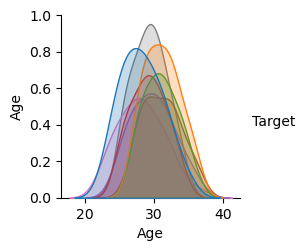

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\Shriyam Singh Tiwari\\Documents\\Train.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Pairplot to see the relationships
sns.pairplot(df, hue='Target')
plt.show()

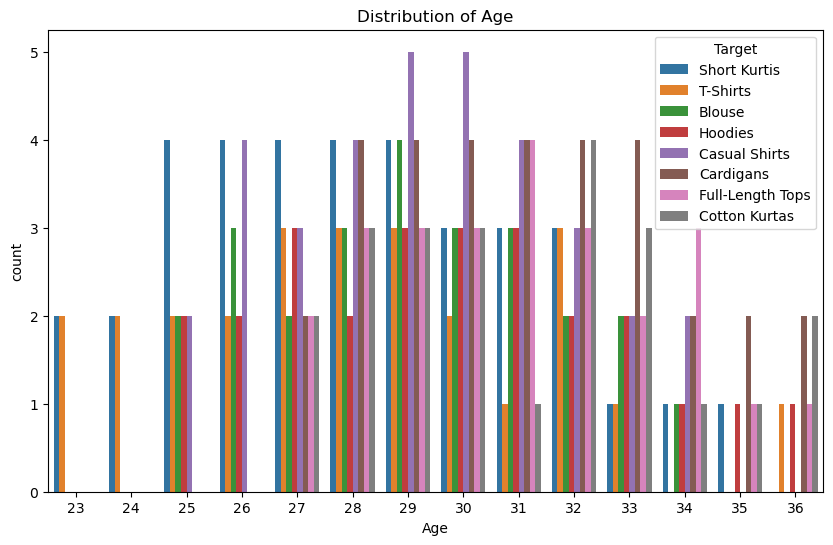

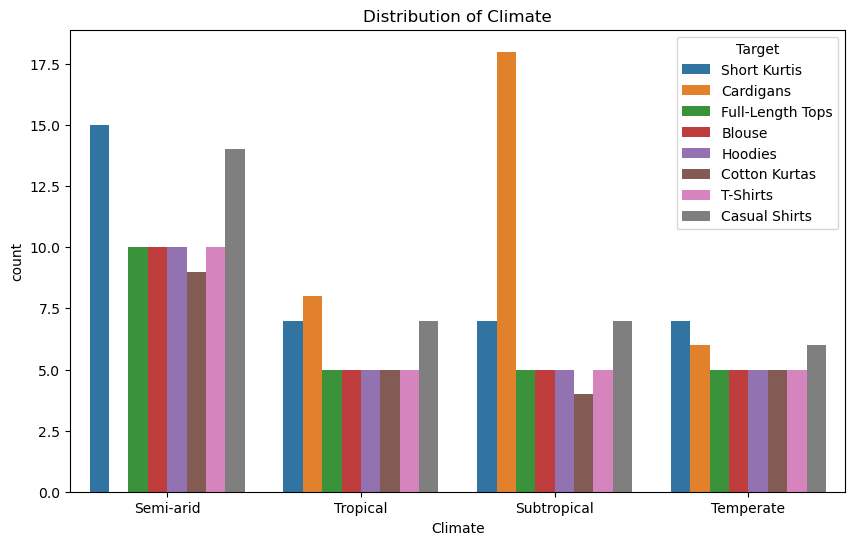

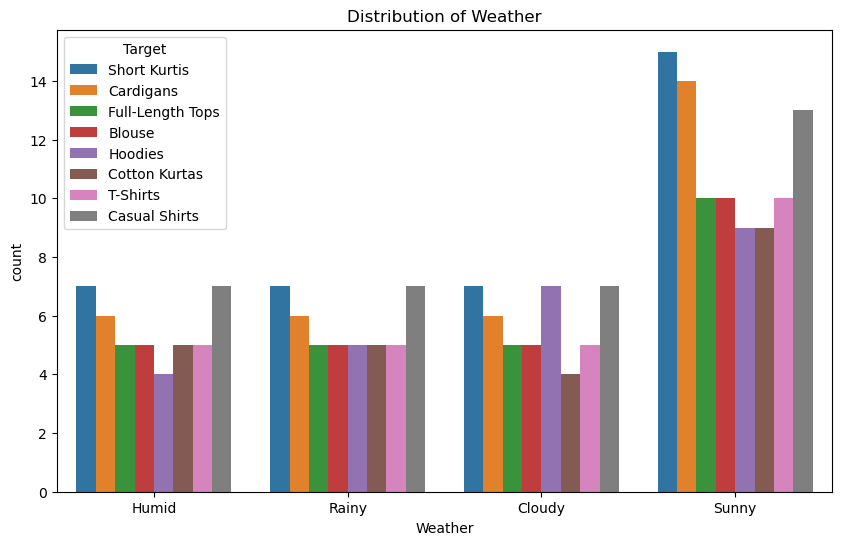

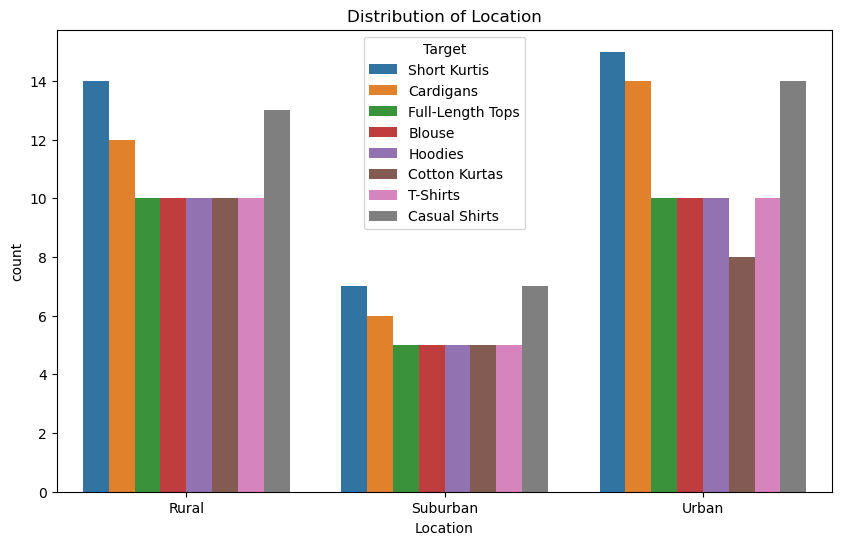

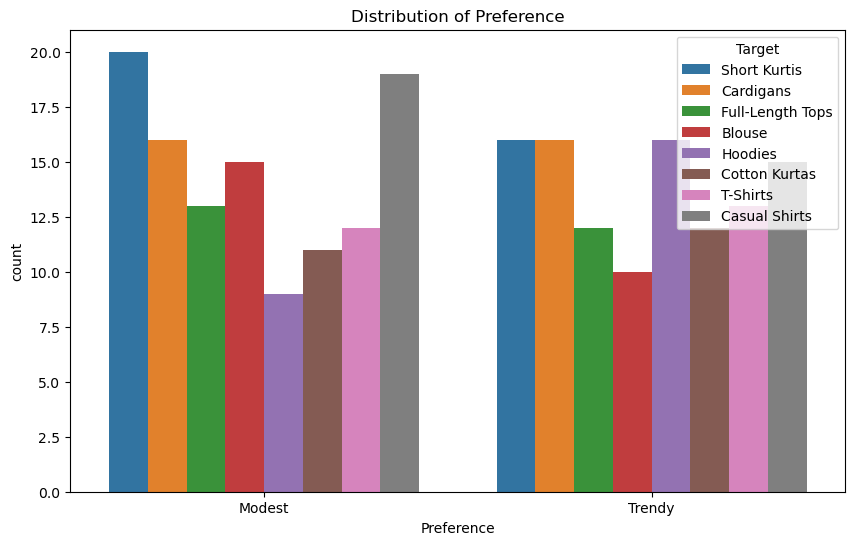

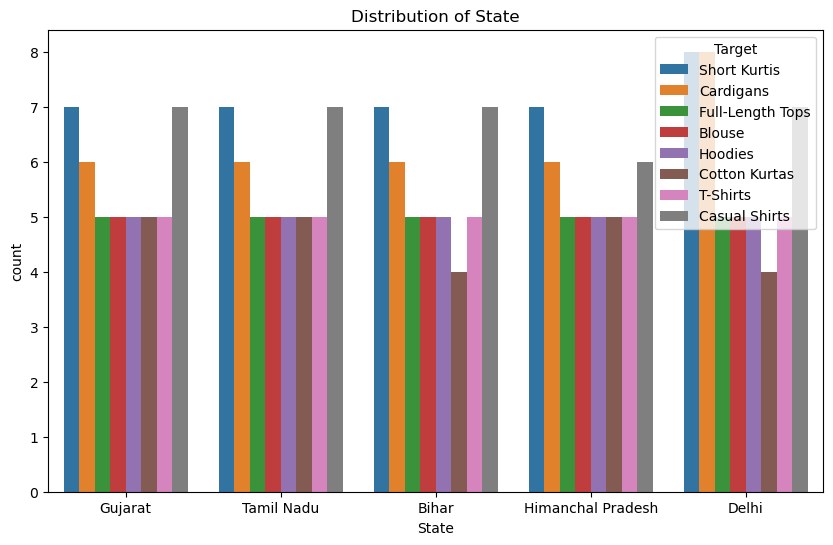

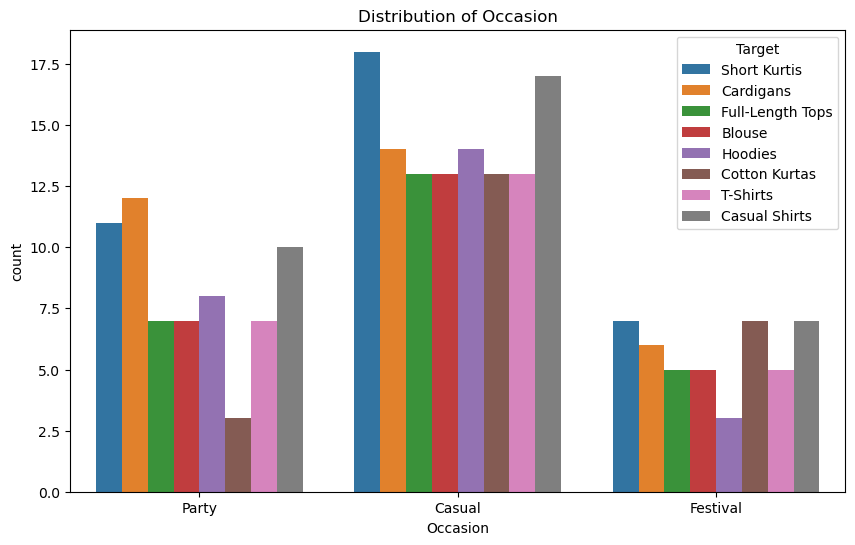

In [39]:
# Distribution of each feature
for column in df.columns:
    if column != 'Target':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, hue='Target')
        plt.title(f'Distribution of {column}')
        plt.show()

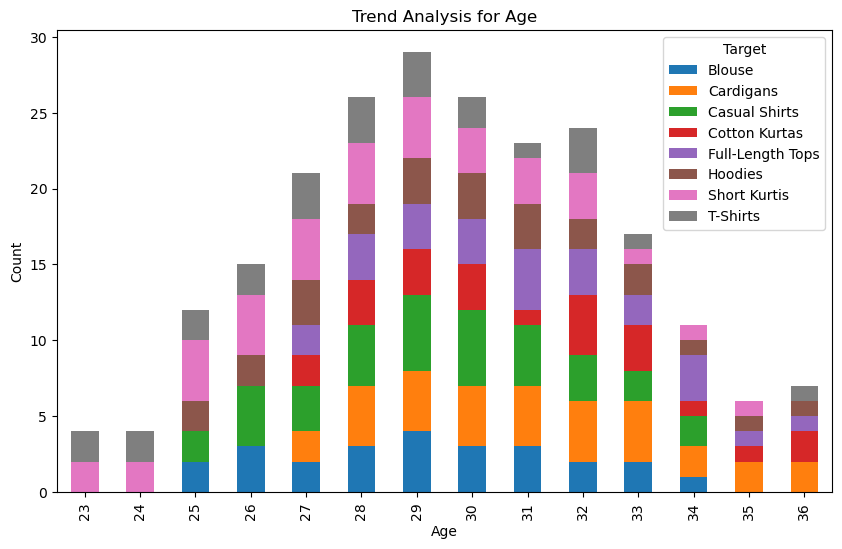

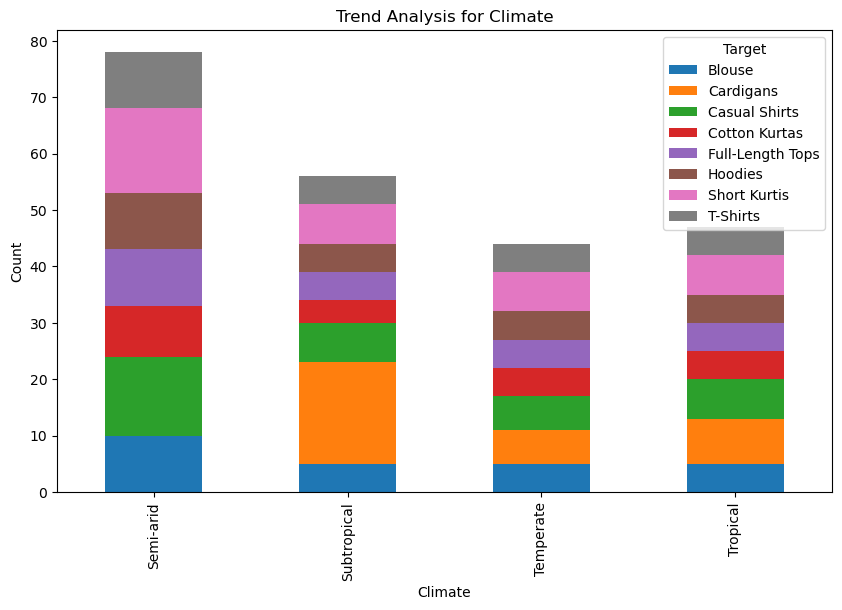

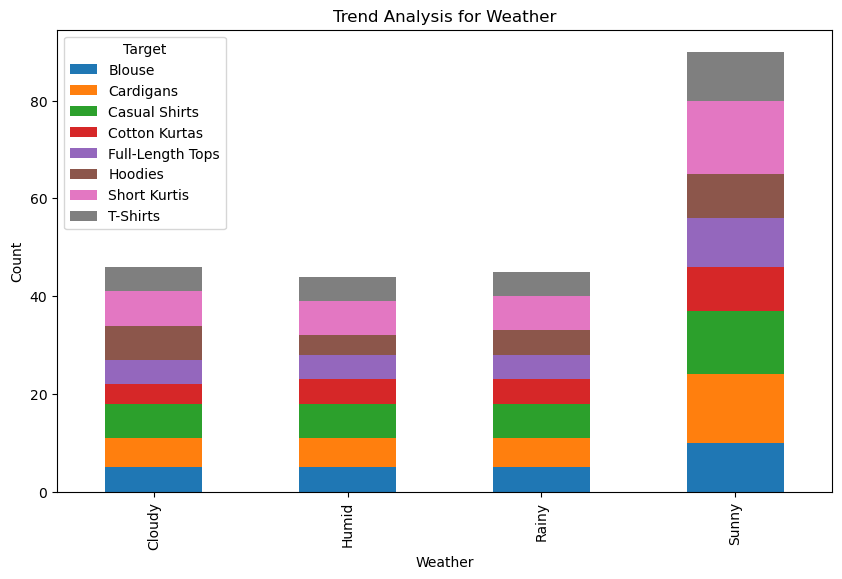

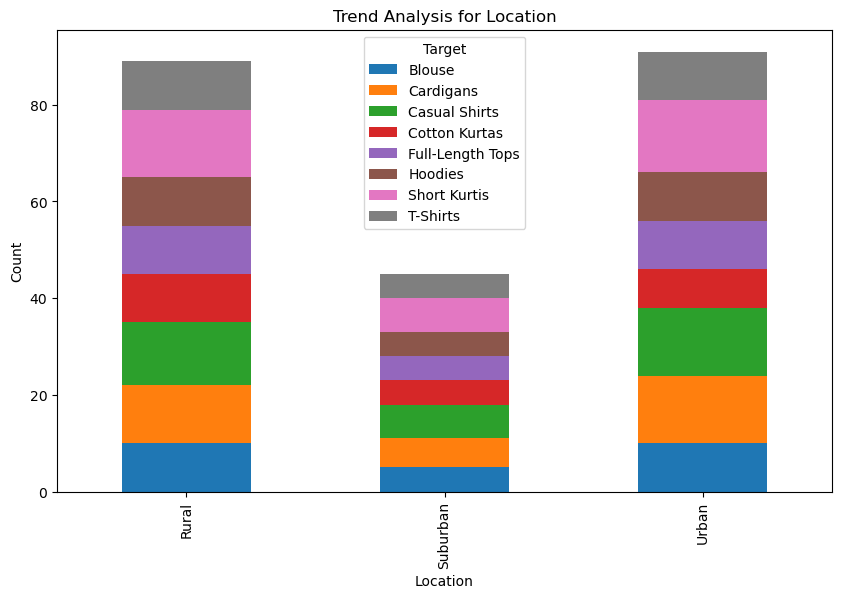

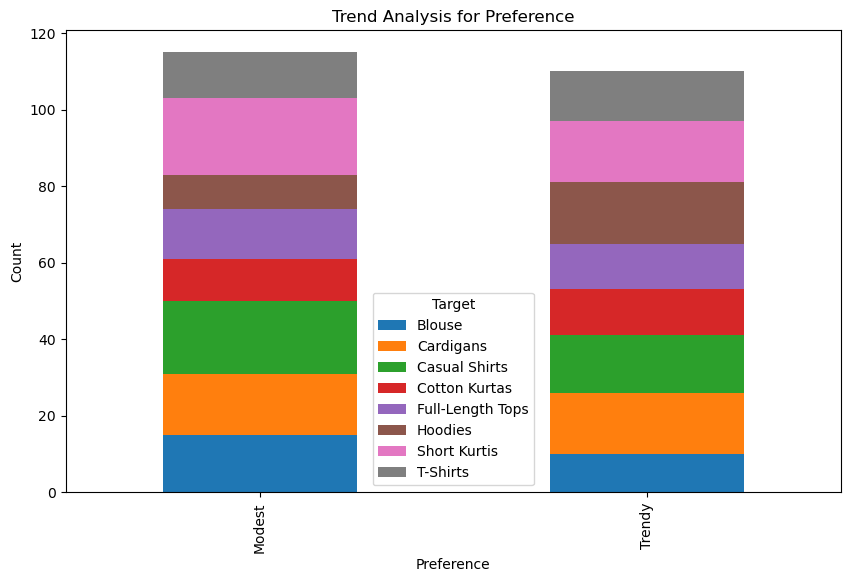

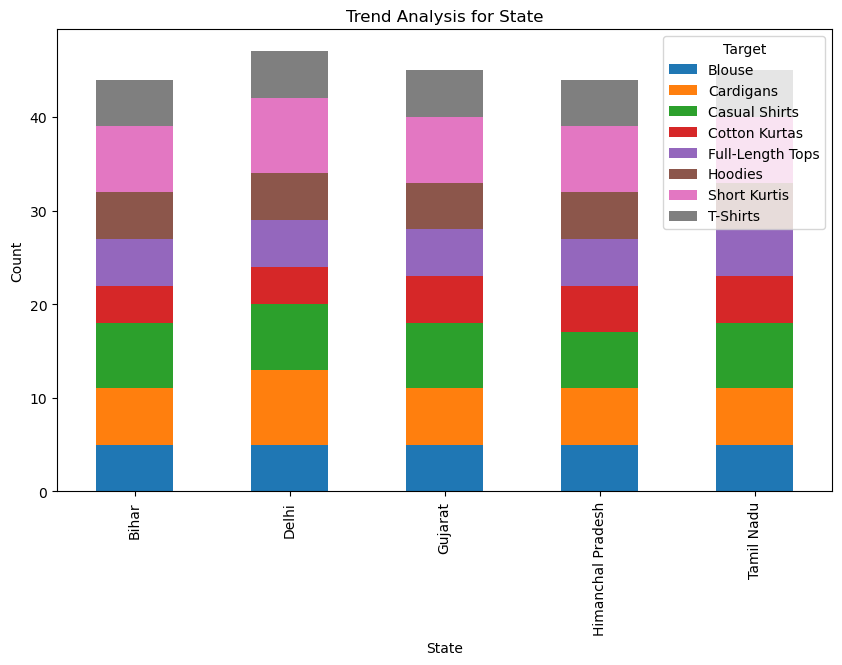

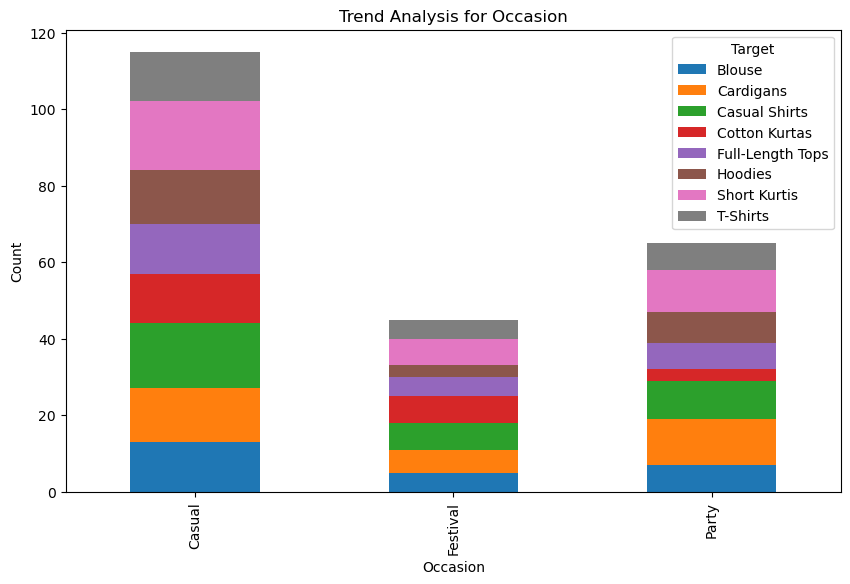

In [47]:
# Group by each feature and the target to see trends
for column in df.columns:
    if column != 'Target':
        trend = df.groupby([column, 'Target']).size().unstack().fillna(0)
        trend.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Trend Analysis for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

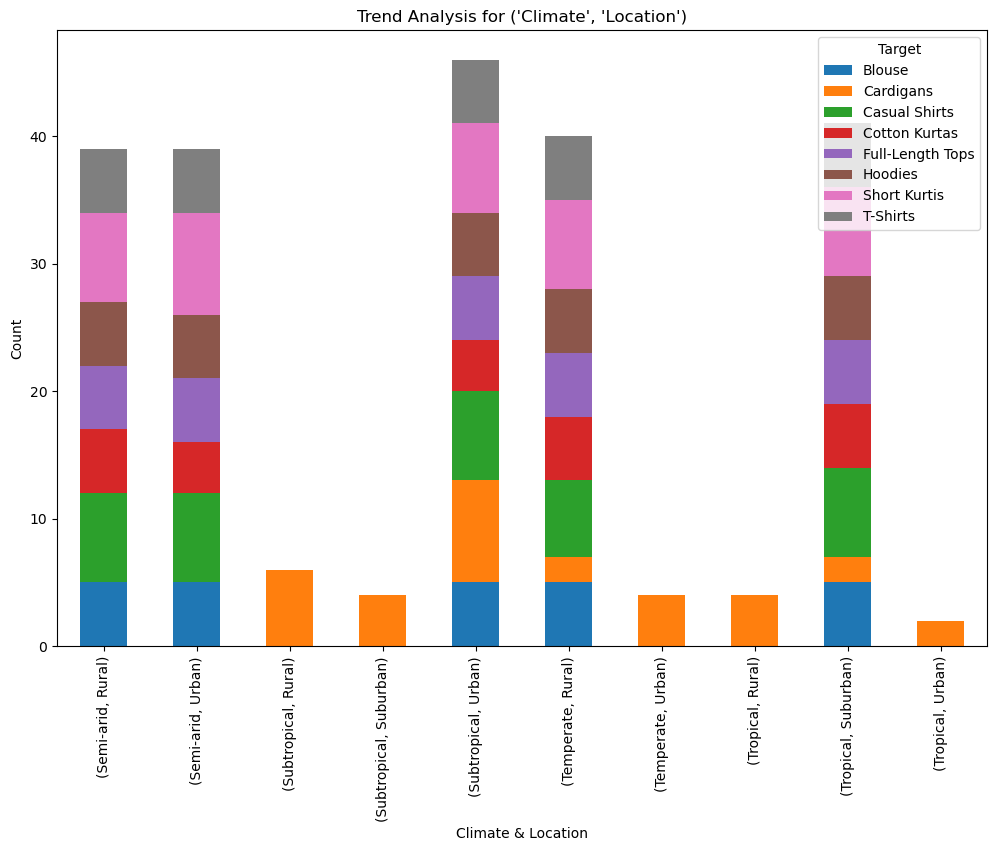

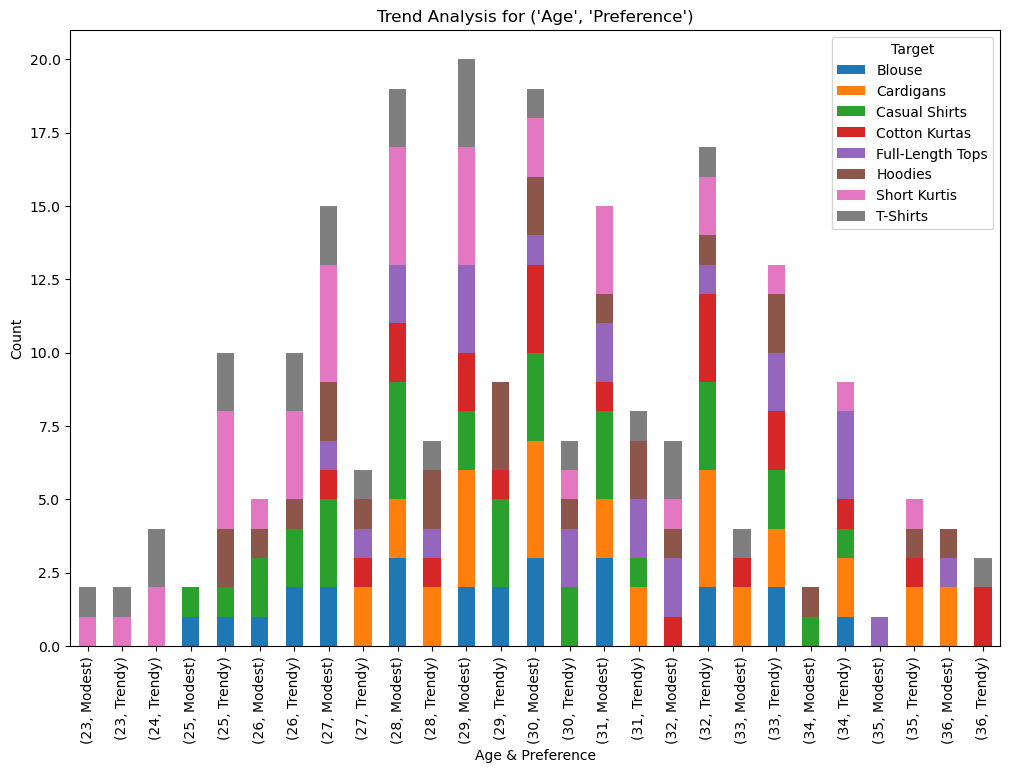

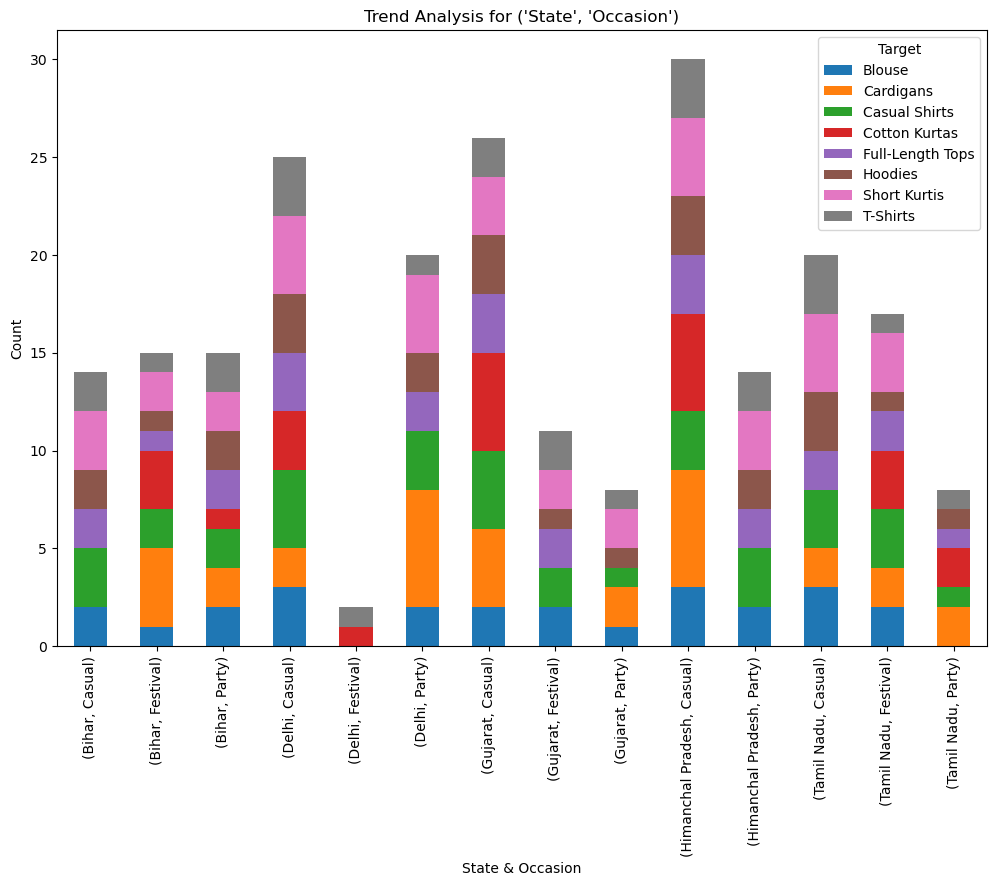

In [49]:
# Analyze combinations of features
combinations = [('Climate', 'Location'), ('Age', 'Preference'), ('State', 'Occasion')]
for combo in combinations:
    trend = df.groupby(list(combo) + ['Target']).size().unstack().fillna(0)
    trend.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Trend Analysis for {combo}')
    plt.xlabel(' & '.join(combo))
    plt.ylabel('Count')
    plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [70]:
# Create a model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Climate', 'Weather',
                                                   'Location', 'Preference',
                                                   'State', 'Occasion'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [72]:
# Evaluate the model
print("Model accuracy on validation data:", model.score(X_val, y_val))

Model accuracy on validation data: 0.26666666666666666


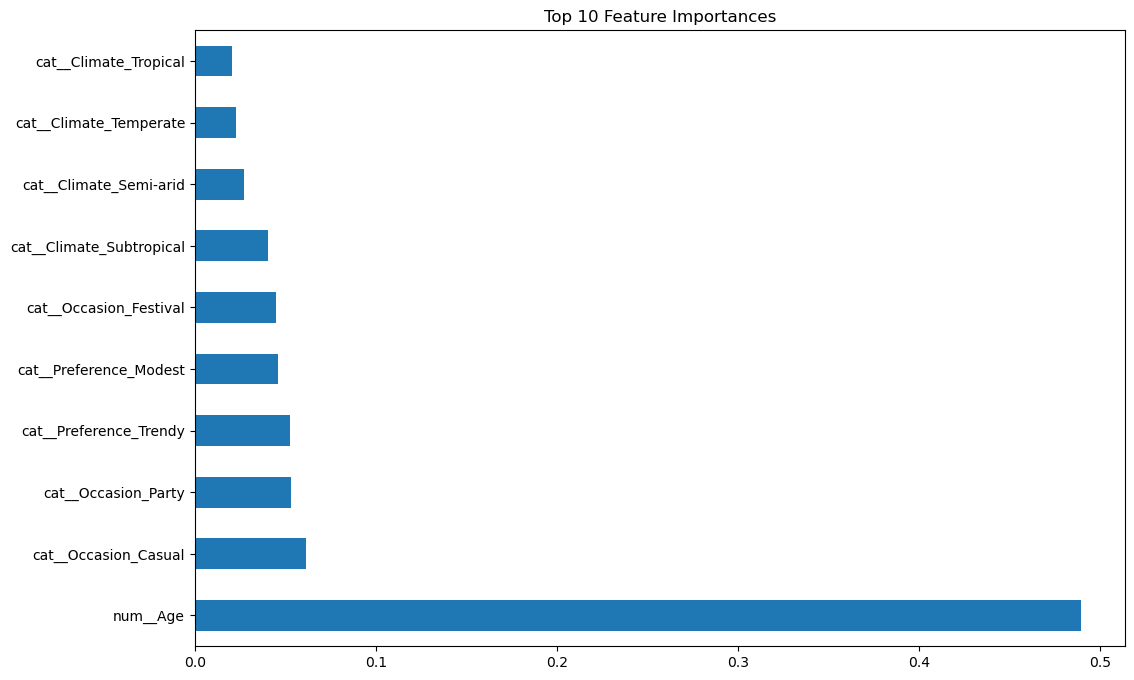


First few rows of the prediction results:
         Actual     Predicted
0  Short Kurtis  Short Kurtis
1  Short Kurtis  Short Kurtis
2  Short Kurtis      T-Shirts
3  Short Kurtis  Short Kurtis
4  Short Kurtis  Short Kurtis


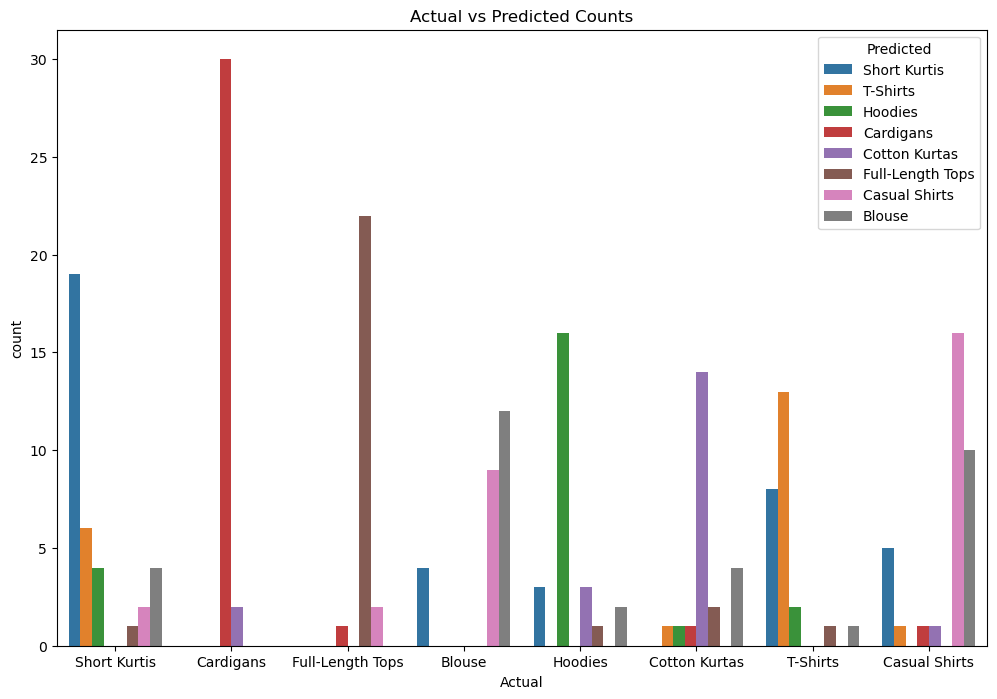

In [74]:
# Plot feature importances
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances
plt.figure(figsize=(12, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

# Predict trends for the test data
X_test = df.drop(columns='Target')
y_test = df['Target']

# Transform the test data using the pipeline
X_test_processed = model.named_steps['preprocessor'].transform(X_test)

# Predict the target for the test data
y_pred = model.named_steps['classifier'].predict(X_test_processed)

# Plot the prediction results
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the results
print("\nFirst few rows of the prediction results:")
print(prediction_results.head())

# Plot actual vs predicted counts
plt.figure(figsize=(12, 8))
sns.countplot(data=prediction_results, x='Actual', hue='Predicted')
plt.title('Actual vs Predicted Counts')
plt.show()